In [55]:
import music21 as m21
import json
import ast

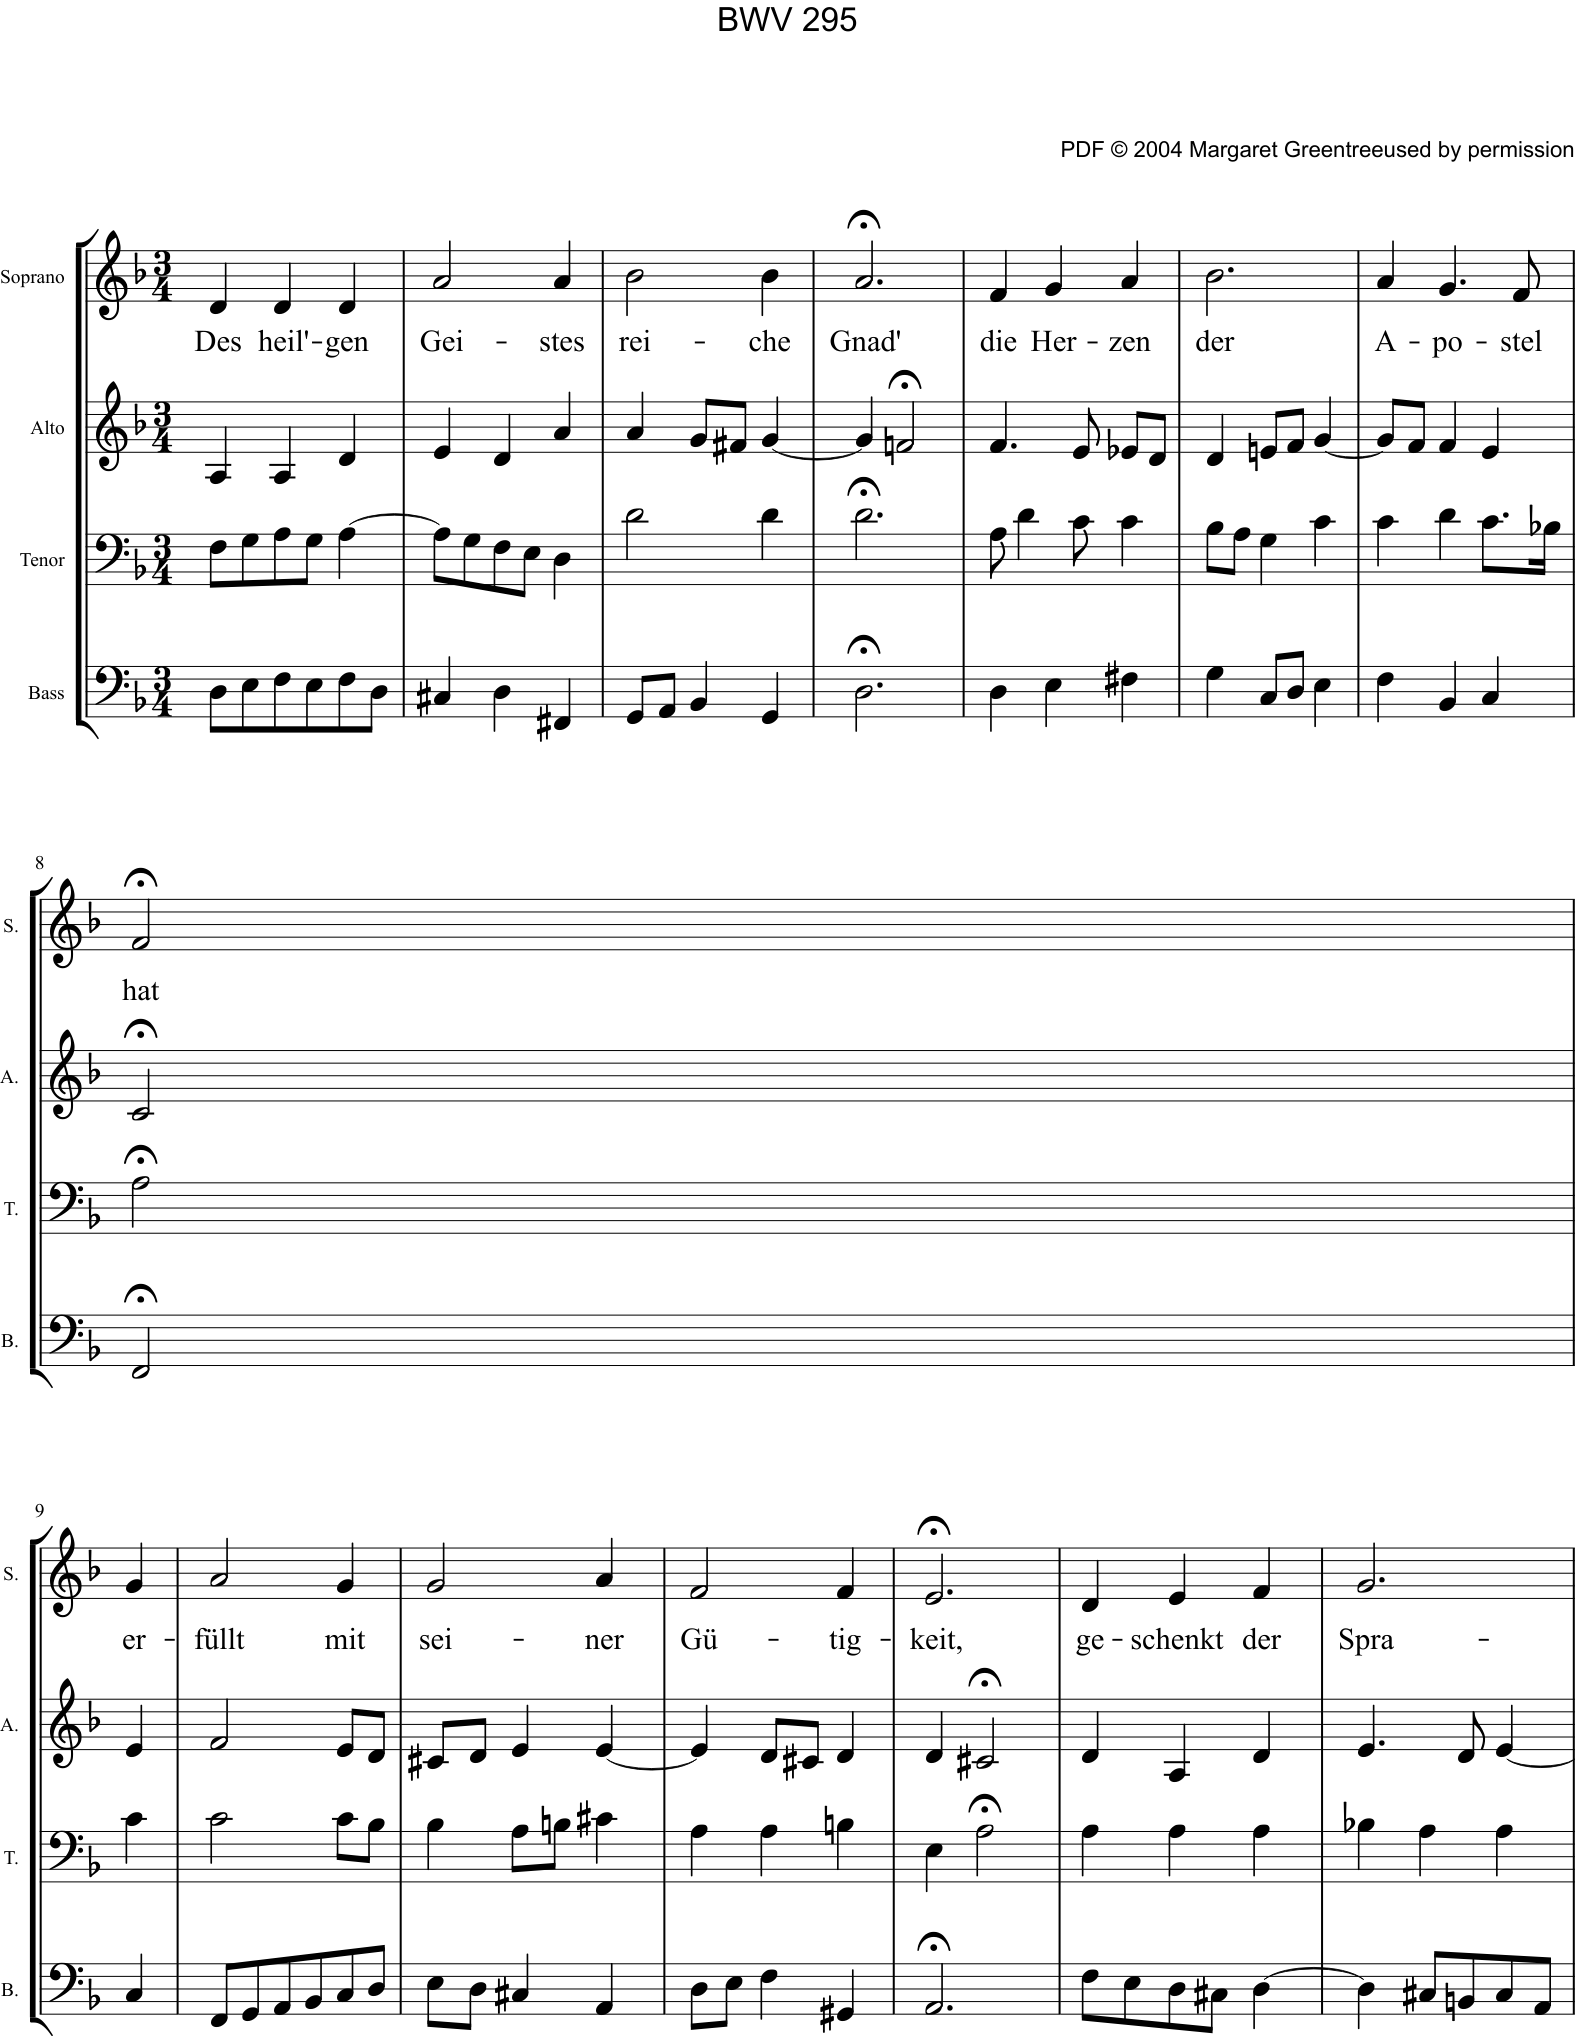

In [2]:
bwv295 = m21.corpus.parse('bach/bwv295')
bwv295.show()

In [3]:
bwv295.show('midi')

In [ ]:
bwv295.flat.show('midi')

In [ ]:
bwv295.chordify().show('midi')

In [ ]:
len(bwv295.parts)

In [ ]:
dir(bwv295)

In [ ]:
print(bwv295.keySignature)

In [ ]:
bwv295.analyze('key')

In [ ]:
analysis

In [ ]:
bwv295.show("ABC")

In [5]:
k = bwv295.analyze('key')
i = m21.interval.Interval(k.tonic, m21.pitch.Pitch('C'))
print(k, i)
sNew = bwv295.transpose(i)
kNew = sNew.analyze("key")
print("New key: ", kNew)

d minor <music21.interval.Interval M-2>
New key:  c minor


In [ ]:
sNew.flat.show("midi")

In [ ]:
PATH='data/music/'

In [ ]:
sNew.flat.write("midi", f'{PATH}bwv295_flat_cminor.mid')

In [ ]:
s = sNew.flat

In [ ]:
s

In [ ]:
s.show('midi')

In [ ]:
s.show('t')

In [ ]:
s.highestTime*4

In [ ]:
dic = {}
for i in range(int(s.highestTime*4)):
    dic[i]=[]
for n in s.notes:
    off = int(n.offset*4)
    d = n.duration
    dur = int(d.quarterLength*4)
    pit = n.pitch.midi
    for i in range(off,off+dur):
        dic[i].append(pit)

In [ ]:
dic

In [ ]:
dic[0]=[]

In [ ]:
dic

In [ ]:
dic[2]=[]

In [ ]:
dic

In [ ]:
dic[0].append(1)

In [ ]:
dic

In [ ]:
def convert_to_pianoroll(work):
    k = work.analyze('key')
    i = interval.Interval(k.tonic, pitch.Pitch('C'))
    wrk = work.flat.transpose(i)
    
    dic = {}
    for i in range(int(wrk.highestTime*4)):
        dic[i]=[]
    for n in wrk.notes:
        off = int(n.offset*4)
        d = n.duration
        dur = int(d.quarterLength*4)
        if n.isChord:
            for nc in n.pitches
        pit = n.pitch.midi
        for i in range(off,off+dur):
            dic[i].append(pit)
    return dic
    #kNew = sNew.analyze("key")
    #print(f"Old key: {k}, New key: {kNew}")

In [ ]:
preprocess_work(corpus.parse('bach/bwv988'))

In [ ]:
paths = corpus.getComposer('bach')

In [ ]:
works

In [ ]:
for path in paths:
    work = corpus.parse(path)
    convert_to_pianoroll_2(work)

In [8]:
def convert_to_pianoroll_2(work):
    k = work.analyze('key')
    i = m21.interval.Interval(k.tonic, m21.pitch.Pitch('C'))
    wrk = work.flat.transpose(i)
    
    dic = {}
    for i in range(int(wrk.highestTime*4)):
        dic[i]=[]
    for n in wrk.notes:
        off = int(n.offset*4)
        d = n.duration
        dur = int(d.quarterLength*4)
        for pit in n.pitches:
            mpit = pit.midi
            for i in range(off,off+dur):
                dic[i].append(mpit)
    return dic

In [44]:
d = convert_to_pianoroll_3(bwv295)

In [45]:
d

{0: [[60, 4], [55, 4], [51, 2], [48, 2]],
 1: [],
 2: [[53, 2], [50, 2]],
 3: [],
 4: [[60, 4], [55, 4], [55, 2], [51, 2]],
 5: [],
 6: [[53, 2], [50, 2]],
 7: [],
 8: [[60, 4], [60, 4], [55, 4], [51, 2]],
 9: [],
 10: [[48, 2]],
 11: [],
 12: [[67, 8], [62, 4], [55, 2], [47, 4]],
 13: [],
 14: [[53, 2]],
 15: [],
 16: [[60, 4], [51, 2], [48, 4]],
 17: [],
 18: [[50, 2]],
 19: [],
 20: [[67, 4], [67, 4], [48, 4], [40, 4]],
 21: [],
 22: [],
 23: [],
 24: [[68, 8], [67, 4], [60, 8], [41, 2]],
 25: [],
 26: [[43, 2]],
 27: [],
 28: [[65, 2], [44, 4]],
 29: [],
 30: [[64, 2]],
 31: [],
 32: [[68, 4], [65, 4], [60, 4], [41, 4]],
 33: [],
 34: [],
 35: [],
 36: [[67, 12], [65, 4], [60, 12], [48, 12]],
 37: [],
 38: [],
 39: [],
 40: [[63, 8]],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [[63, 4], [63, 6], [55, 2], [48, 4]],
 49: [],
 50: [[60, 4]],
 51: [],
 52: [[65, 4], [50, 4]],
 53: [],
 54: [[62, 2], [58, 2]],
 55: [],
 56: [[67, 4], [61, 2], [58, 4], [52, 4]],


In [46]:
s1 = m21.stream.Stream()

In [51]:
for notes in d:
    for mpit in d[notes]:
        n = m21.note.Note()
        n.pitch.midi = mpit[0]
        n.quarterLength = mpit[1]/4
        offset = notes/4
        s1.insert(offset, n)
        print(f'{offset} {n.quarterLength} {n.pitch.midi}')

0.0 1.0 60
0.0 1.0 55
0.0 0.5 51
0.0 0.5 48
0.5 0.5 53
0.5 0.5 50
1.0 1.0 60
1.0 1.0 55
1.0 0.5 55
1.0 0.5 51
1.5 0.5 53
1.5 0.5 50
2.0 1.0 60
2.0 1.0 60
2.0 1.0 55
2.0 0.5 51
2.5 0.5 48
3.0 2.0 67
3.0 1.0 62
3.0 0.5 55
3.0 1.0 47
3.5 0.5 53
4.0 1.0 60
4.0 0.5 51
4.0 1.0 48
4.5 0.5 50
5.0 1.0 67
5.0 1.0 67
5.0 1.0 48
5.0 1.0 40
6.0 2.0 68
6.0 1.0 67
6.0 2.0 60
6.0 0.5 41
6.5 0.5 43
7.0 0.5 65
7.0 1.0 44
7.5 0.5 64
8.0 1.0 68
8.0 1.0 65
8.0 1.0 60
8.0 1.0 41
9.0 3.0 67
9.0 1.0 65
9.0 3.0 60
9.0 3.0 48
10.0 2.0 63
12.0 1.0 63
12.0 1.5 63
12.0 0.5 55
12.0 1.0 48
12.5 1.0 60
13.0 1.0 65
13.0 1.0 50
13.5 0.5 62
13.5 0.5 58
14.0 1.0 67
14.0 0.5 61
14.0 1.0 58
14.0 1.0 52
14.5 0.5 60
15.0 3.0 68
15.0 1.0 60
15.0 0.5 56
15.0 1.0 53
15.5 0.5 55
16.0 0.5 62
16.0 1.0 53
16.0 0.5 46
16.5 0.5 63
16.5 0.5 48
17.0 1.0 65
17.0 1.0 58
17.0 1.0 50
18.0 1.0 67
18.0 0.5 65
18.0 1.0 58
18.0 1.0 51
18.5 0.5 63
19.0 1.5 65
19.0 1.0 63
19.0 1.0 60
19.0 1.0 44
20.0 1.0 62
20.0 0.75 58
20.0 1.0 46
20.5 0.5 63
2

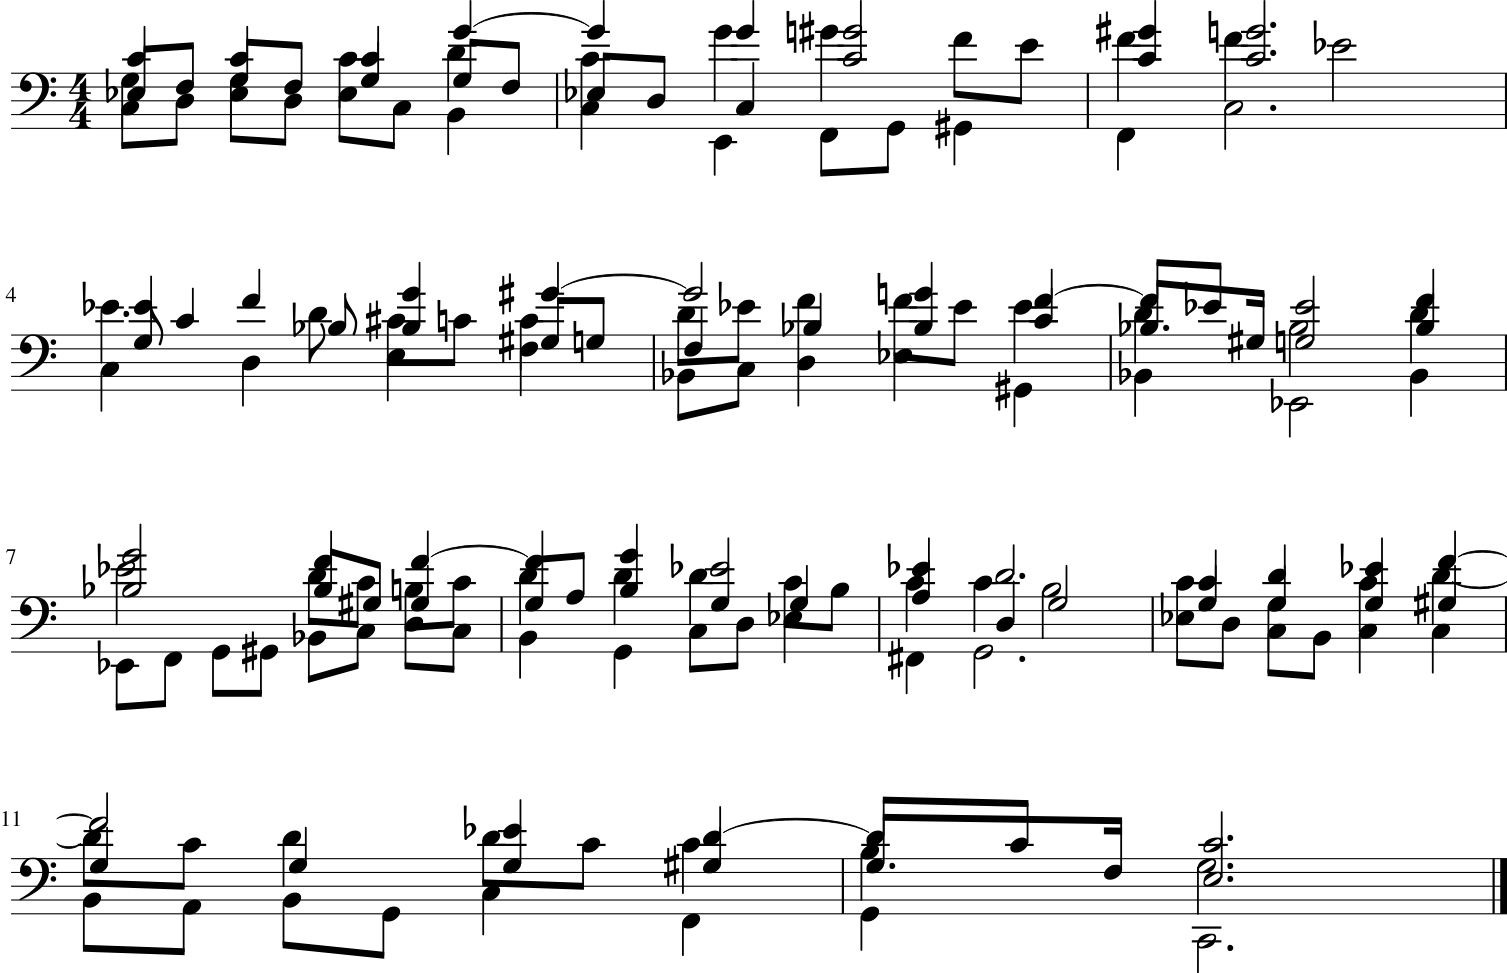

In [48]:
s1.show()

In [49]:
s1.show('midi')

In [16]:
n.quarterLength = 4

In [52]:
def convert_to_mldata(work):
    k = work.analyze('key')
    i = m21.interval.Interval(k.tonic, m21.pitch.Pitch('C'))
    wrk = work.flat.transpose(i)
    
    dic = {}
    for i in range(int(wrk.highestTime*4)):
        dic[i]=[]
    for n in wrk.notes:
        off = int(n.offset*4)
        d = n.duration
        dur = int(d.quarterLength*4)
        for pit in n.pitches:
            mpit = pit.midi
            dic[off].append([mpit,dur])
    return dic

In [53]:
dic = convert_to_mldata(bwv295)

In [62]:
with open('file.txt', 'w') as file:
     file.write(json.dumps(dic)) # use `json.loads` to do the reverse

In [101]:
def convert_to_mldata_2(work):
    k = work.analyze('key')
    i = m21.interval.Interval(k.tonic, m21.pitch.Pitch('C'))
    wrk = work.flat.transpose(i)
    
    lst = []
    for i in range(int(wrk.highestTime*4)):
        lst.append([])
    for n in wrk.notes:
        off = int(n.offset*4)
        d = n.duration
        dur = int(d.quarterLength*4)
        for pit in n.pitches:
            name = pit.nameWithOctave
            lst[off].append([name,d.fullName])
        """
        ss = "Begin./n"
        for i in range(len(lst)):
            i_len = len(lst[i])
            if i_len>0:
                ss.append(f"Row {i} contains the following notes:")
                for j in range(i_len):
         """           
                
    return lst

In [102]:
dic = convert_to_mldata_2(bwv295)

In [103]:
len(dic)

192

In [82]:
def convert_from_mldata(lst):
    s1 = m21.stream.Stream()
    for i in range(len(lst)):
        for element in lst[i]:
            n = m21.note.Note()
            n.pitch.midi = element[0]
            n.quarterLength = element[1]/4
            offset = i/4
            s1.insert(offset, n)
            print(f'{offset} {n.quarterLength} {n.pitch.midi}')
    return s1

In [83]:
stream = convert_from_mldata(dic)

0.0 1.0 60
0.0 1.0 55
0.0 0.5 51
0.0 0.5 48
0.5 0.5 53
0.5 0.5 50
1.0 1.0 60
1.0 1.0 55
1.0 0.5 55
1.0 0.5 51
1.5 0.5 53
1.5 0.5 50
2.0 1.0 60
2.0 1.0 60
2.0 1.0 55
2.0 0.5 51
2.5 0.5 48
3.0 2.0 67
3.0 1.0 62
3.0 0.5 55
3.0 1.0 47
3.5 0.5 53
4.0 1.0 60
4.0 0.5 51
4.0 1.0 48
4.5 0.5 50
5.0 1.0 67
5.0 1.0 67
5.0 1.0 48
5.0 1.0 40
6.0 2.0 68
6.0 1.0 67
6.0 2.0 60
6.0 0.5 41
6.5 0.5 43
7.0 0.5 65
7.0 1.0 44
7.5 0.5 64
8.0 1.0 68
8.0 1.0 65
8.0 1.0 60
8.0 1.0 41
9.0 3.0 67
9.0 1.0 65
9.0 3.0 60
9.0 3.0 48
10.0 2.0 63
12.0 1.0 63
12.0 1.5 63
12.0 0.5 55
12.0 1.0 48
12.5 1.0 60
13.0 1.0 65
13.0 1.0 50
13.5 0.5 62
13.5 0.5 58
14.0 1.0 67
14.0 0.5 61
14.0 1.0 58
14.0 1.0 52
14.5 0.5 60
15.0 3.0 68
15.0 1.0 60
15.0 0.5 56
15.0 1.0 53
15.5 0.5 55
16.0 0.5 62
16.0 1.0 53
16.0 0.5 46
16.5 0.5 63
16.5 0.5 48
17.0 1.0 65
17.0 1.0 58
17.0 1.0 50
18.0 1.0 67
18.0 0.5 65
18.0 1.0 58
18.0 1.0 51
18.5 0.5 63
19.0 1.5 65
19.0 1.0 63
19.0 1.0 60
19.0 1.0 44
20.0 1.0 62
20.0 0.75 58
20.0 1.0 46
20.5 0.5 63
2

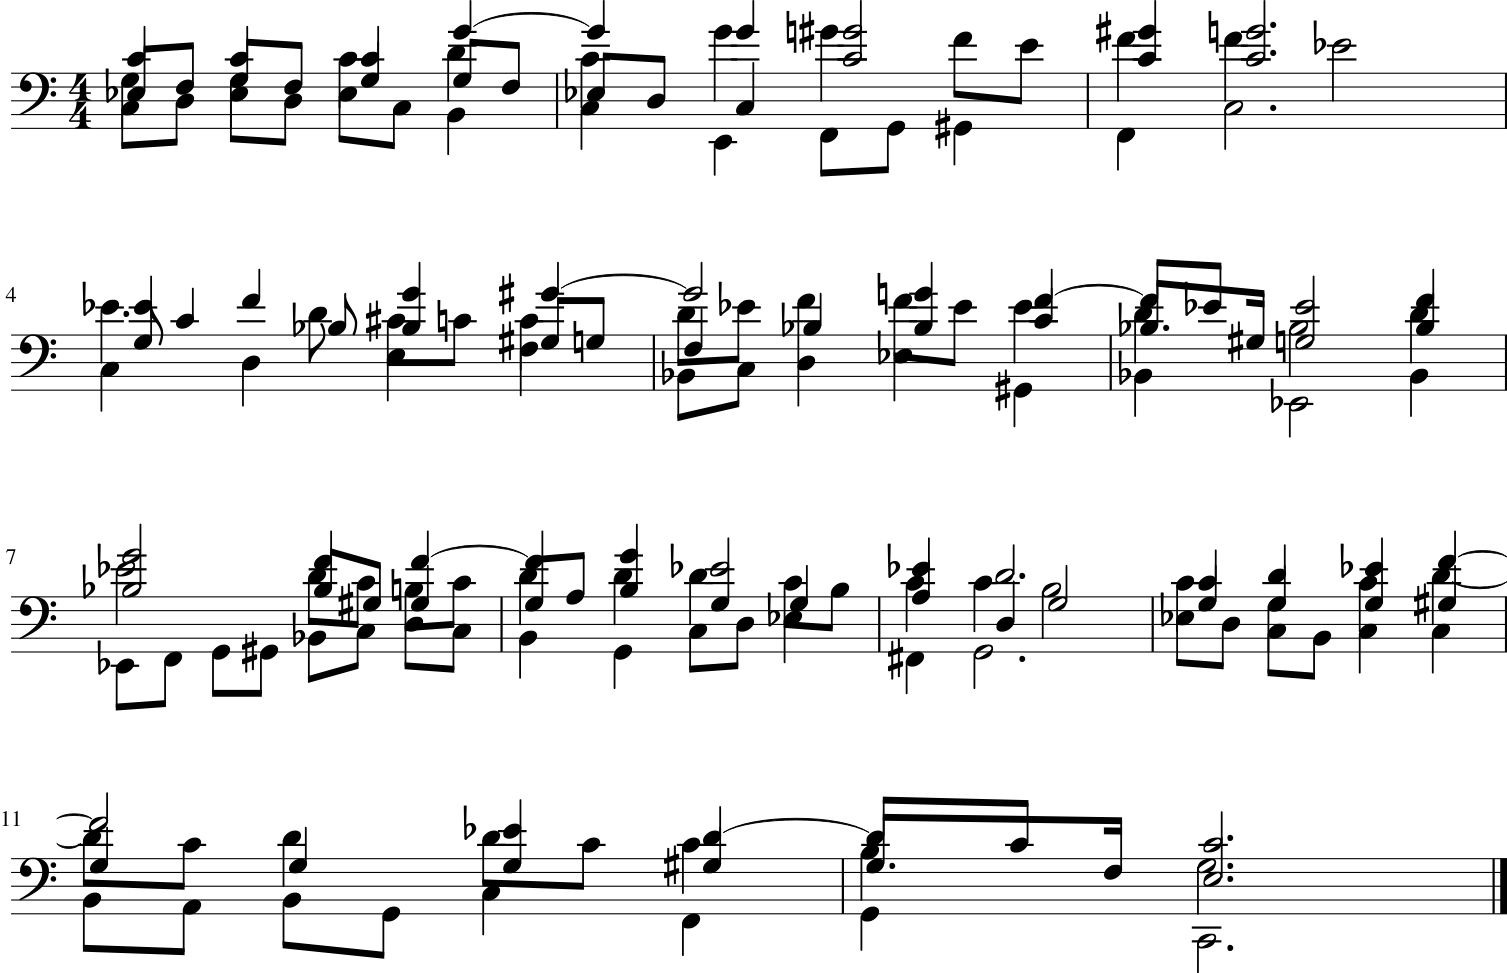

In [84]:
stream.show()

In [85]:
65.toString

SyntaxError: invalid syntax (<ipython-input-85-6ef7c3b92b6a>, line 1)

In [104]:
dic

[[['C4', 'Quarter'], ['G3', 'Quarter'], ['E-3', 'Eighth'], ['C3', 'Eighth']],
 [],
 [['F3', 'Eighth'], ['D3', 'Eighth']],
 [],
 [['C4', 'Quarter'], ['G3', 'Quarter'], ['G3', 'Eighth'], ['E-3', 'Eighth']],
 [],
 [['F3', 'Eighth'], ['D3', 'Eighth']],
 [],
 [['C4', 'Quarter'], ['C4', 'Quarter'], ['G3', 'Quarter'], ['E-3', 'Eighth']],
 [],
 [['C3', 'Eighth']],
 [],
 [['G4', 'Half'], ['D4', 'Quarter'], ['G3', 'Eighth'], ['B2', 'Quarter']],
 [],
 [['F3', 'Eighth']],
 [],
 [['C4', 'Quarter'], ['E-3', 'Eighth'], ['C3', 'Quarter']],
 [],
 [['D3', 'Eighth']],
 [],
 [['G4', 'Quarter'], ['G4', 'Quarter'], ['C3', 'Quarter'], ['E2', 'Quarter']],
 [],
 [],
 [],
 [['A-4', 'Half'], ['G4', 'Quarter'], ['C4', 'Half'], ['F2', 'Eighth']],
 [],
 [['G2', 'Eighth']],
 [],
 [['F4', 'Eighth'], ['A-2', 'Quarter']],
 [],
 [['E4', 'Eighth']],
 [],
 [['A-4', 'Quarter'], ['F4', 'Quarter'], ['C4', 'Quarter'], ['F2', 'Quarter']],
 [],
 [],
 [],
 [['G4', 'Dotted Half'],
  ['F4', 'Quarter'],
  ['C4', 'Dotted Half'],
  [

In [91]:
str(dic)

'[[[60, 4], [55, 4], [51, 2], [48, 2]], [], [[53, 2], [50, 2]], [], [[60, 4], [55, 4], [55, 2], [51, 2]], [], [[53, 2], [50, 2]], [], [[60, 4], [60, 4], [55, 4], [51, 2]], [], [[48, 2]], [], [[67, 8], [62, 4], [55, 2], [47, 4]], [], [[53, 2]], [], [[60, 4], [51, 2], [48, 4]], [], [[50, 2]], [], [[67, 4], [67, 4], [48, 4], [40, 4]], [], [], [], [[68, 8], [67, 4], [60, 8], [41, 2]], [], [[43, 2]], [], [[65, 2], [44, 4]], [], [[64, 2]], [], [[68, 4], [65, 4], [60, 4], [41, 4]], [], [], [], [[67, 12], [65, 4], [60, 12], [48, 12]], [], [], [], [[63, 8]], [], [], [], [], [], [], [], [[63, 4], [63, 6], [55, 2], [48, 4]], [], [[60, 4]], [], [[65, 4], [50, 4]], [], [[62, 2], [58, 2]], [], [[67, 4], [61, 2], [58, 4], [52, 4]], [], [[60, 2]], [], [[68, 12], [60, 4], [56, 2], [53, 4]], [], [[55, 2]], [], [[62, 2], [53, 4], [46, 2]], [], [[63, 2], [48, 2]], [], [[65, 4], [58, 4], [50, 4]], [], [], [], [[67, 4], [65, 2], [58, 4], [51, 4]], [], [[63, 2]], [], [[65, 6], [63, 4], [60, 4], [44, 4]], [],

In [92]:
import spacy

In [93]:
from torchtext.data import Field
tokenize = lambda x: x.split()
TEXT = Field(sequential=True, tokenize=tokenize, lower=True)
LABEL = Field(sequential=False, use_vocab=False)

In [94]:
n

<music21.note.Note C>

In [95]:
n.pitch

<music21.pitch.Pitch C2>

In [98]:
n.pitch.nameWithOctave

'C2'

In [99]:
n.pitch.midi = 129

In [100]:
n.pitch.nameWithOctave

'A8'

In [261]:
def convert_to_mldata_3(work):
    k = work.analyze('key')
    i = m21.interval.Interval(k.tonic, m21.pitch.Pitch('C'))
    wrk = work.flat.transpose(i)
    
    lst = []
    for i in range(int(wrk.highestTime*4)):
        lst.append([])
    for n in wrk.notes:
        off = int(n.offset*4)
        d = n.duration
        dur = int(d.quarterLength*4)
        for pit in n.pitches:
            name = pit.nameWithOctave
            lst[off].append([name,int(d.quarterLength*4)])
        
        ss = "Begin."
        for i in range(len(lst)):
            i_len = len(lst[i])
            if i_len>0:
                ss+="\nThis timestamp contains the following notes: "
                for j in range(i_len):
                    ss+=f"'{lst[i][j][0]}'/ '{lst[i][j][1]}'"
                    if j == i_len-1:
                        ss+="."
                    else:
                        ss+=", "
            else:
                ss+=f"\nThis timestamp is empty."
        ss+="\nEnd."
    return lst, ss

In [262]:
lst, ss = convert_to_mldata_3(bwv295)

In [263]:
print(ss)

Begin.
This timestamp contains the following notes: 'C4'/ '4', 'G3'/ '4', 'E-3'/ '2', 'C3'/ '2'.
This timestamp is empty.
This timestamp contains the following notes: 'F3'/ '2', 'D3'/ '2'.
This timestamp is empty.
This timestamp contains the following notes: 'C4'/ '4', 'G3'/ '4', 'G3'/ '2', 'E-3'/ '2'.
This timestamp is empty.
This timestamp contains the following notes: 'F3'/ '2', 'D3'/ '2'.
This timestamp is empty.
This timestamp contains the following notes: 'C4'/ '4', 'C4'/ '4', 'G3'/ '4', 'E-3'/ '2'.
This timestamp is empty.
This timestamp contains the following notes: 'C3'/ '2'.
This timestamp is empty.
This timestamp contains the following notes: 'G4'/ '8', 'D4'/ '4', 'G3'/ '2', 'B2'/ '4'.
This timestamp is empty.
This timestamp contains the following notes: 'F3'/ '2'.
This timestamp is empty.
This timestamp contains the following notes: 'C4'/ '4', 'E-3'/ '2', 'C3'/ '4'.
This timestamp is empty.
This timestamp contains the following notes: 'D3'/ '2'.
This timestamp is empty.
Thi

In [121]:
dic

[[['C4', 'Quarter'], ['G3', 'Quarter'], ['E-3', 'Eighth'], ['C3', 'Eighth']],
 [],
 [['F3', 'Eighth'], ['D3', 'Eighth']],
 [],
 [['C4', 'Quarter'], ['G3', 'Quarter'], ['G3', 'Eighth'], ['E-3', 'Eighth']],
 [],
 [['F3', 'Eighth'], ['D3', 'Eighth']],
 [],
 [['C4', 'Quarter'], ['C4', 'Quarter'], ['G3', 'Quarter'], ['E-3', 'Eighth']],
 [],
 [['C3', 'Eighth']],
 [],
 [['G4', 'Half'], ['D4', 'Quarter'], ['G3', 'Eighth'], ['B2', 'Quarter']],
 [],
 [['F3', 'Eighth']],
 [],
 [['C4', 'Quarter'], ['E-3', 'Eighth'], ['C3', 'Quarter']],
 [],
 [['D3', 'Eighth']],
 [],
 [['G4', 'Quarter'], ['G4', 'Quarter'], ['C3', 'Quarter'], ['E2', 'Quarter']],
 [],
 [],
 [],
 [['A-4', 'Half'], ['G4', 'Quarter'], ['C4', 'Half'], ['F2', 'Eighth']],
 [],
 [['G2', 'Eighth']],
 [],
 [['F4', 'Eighth'], ['A-2', 'Quarter']],
 [],
 [['E4', 'Eighth']],
 [],
 [['A-4', 'Quarter'], ['F4', 'Quarter'], ['C4', 'Quarter'], ['F2', 'Quarter']],
 [],
 [],
 [],
 [['G4', 'Dotted Half'],
  ['F4', 'Quarter'],
  ['C4', 'Dotted Half'],
  [

In [122]:
dic[1,1]

TypeError: list indices must be integers or slices, not tuple

In [123]:
dic[1]

[]

In [124]:
dic[0]

[['C4', 'Quarter'], ['G3', 'Quarter'], ['E-3', 'Eighth'], ['C3', 'Eighth']]

In [125]:
dic[0][0]

['C4', 'Quarter']

In [126]:
dic[0][0][0]

'C4'

In [146]:
l=json.dumps(a)

In [150]:
a

"[['aaa','bbb'][]]"

In [149]:
lst=json.loads(a)

JSONDecodeError: Expecting value: line 1 column 3 (char 2)

In [152]:
a = json.dumps(dic)

In [153]:
lst = json.loads(a)

In [154]:
lst

[[['C4', 'Quarter'], ['G3', 'Quarter'], ['E-3', 'Eighth'], ['C3', 'Eighth']],
 [],
 [['F3', 'Eighth'], ['D3', 'Eighth']],
 [],
 [['C4', 'Quarter'], ['G3', 'Quarter'], ['G3', 'Eighth'], ['E-3', 'Eighth']],
 [],
 [['F3', 'Eighth'], ['D3', 'Eighth']],
 [],
 [['C4', 'Quarter'], ['C4', 'Quarter'], ['G3', 'Quarter'], ['E-3', 'Eighth']],
 [],
 [['C3', 'Eighth']],
 [],
 [['G4', 'Half'], ['D4', 'Quarter'], ['G3', 'Eighth'], ['B2', 'Quarter']],
 [],
 [['F3', 'Eighth']],
 [],
 [['C4', 'Quarter'], ['E-3', 'Eighth'], ['C3', 'Quarter']],
 [],
 [['D3', 'Eighth']],
 [],
 [['G4', 'Quarter'], ['G4', 'Quarter'], ['C3', 'Quarter'], ['E2', 'Quarter']],
 [],
 [],
 [],
 [['A-4', 'Half'], ['G4', 'Quarter'], ['C4', 'Half'], ['F2', 'Eighth']],
 [],
 [['G2', 'Eighth']],
 [],
 [['F4', 'Eighth'], ['A-2', 'Quarter']],
 [],
 [['E4', 'Eighth']],
 [],
 [['A-4', 'Quarter'], ['F4', 'Quarter'], ['C4', 'Quarter'], ['F2', 'Quarter']],
 [],
 [],
 [],
 [['G4', 'Dotted Half'],
  ['F4', 'Quarter'],
  ['C4', 'Dotted Half'],
  [

In [266]:
lst, ss = convert_to_mldata_3(bwv295)

In [267]:
ss = ss.replace("Begin.","[")
ss = ss.replace("\nEnd.","x]")
ss = ss.replace("\nThis timestamp contains the following notes: ","[[")
ss = ss.replace("\nThis timestamp is empty.", "[]*")
ss = ss.replace(", ","], [")
ss = ss.replace("/ ",", ")
ss = ss.replace(".","]], ")
ss = ss.replace("*",", ")
ss = ss.replace("[], x]","[]]")

In [268]:
ss

"[[['C4', '4'], ['G3', '4'], ['E-3', '2'], ['C3', '2']], [], [['F3', '2'], ['D3', '2']], [], [['C4', '4'], ['G3', '4'], ['G3', '2'], ['E-3', '2']], [], [['F3', '2'], ['D3', '2']], [], [['C4', '4'], ['C4', '4'], ['G3', '4'], ['E-3', '2']], [], [['C3', '2']], [], [['G4', '8'], ['D4', '4'], ['G3', '2'], ['B2', '4']], [], [['F3', '2']], [], [['C4', '4'], ['E-3', '2'], ['C3', '4']], [], [['D3', '2']], [], [['G4', '4'], ['G4', '4'], ['C3', '4'], ['E2', '4']], [], [], [], [['A-4', '8'], ['G4', '4'], ['C4', '8'], ['F2', '2']], [], [['G2', '2']], [], [['F4', '2'], ['A-2', '4']], [], [['E4', '2']], [], [['A-4', '4'], ['F4', '4'], ['C4', '4'], ['F2', '4']], [], [], [], [['G4', '12'], ['F4', '4'], ['C4', '12'], ['C3', '12']], [], [], [], [['E-4', '8']], [], [], [], [], [], [], [], [['E-4', '4'], ['E-4', '6'], ['G3', '2'], ['C3', '4']], [], [['C4', '4']], [], [['F4', '4'], ['D3', '4']], [], [['D4', '2'], ['B-3', '2']], [], [['G4', '4'], ['D-4', '2'], ['B-3', '4'], ['E3', '4']], [], [['C4', '2']], [

In [269]:
import ast
lst = ast.literal_eval(ss)

In [270]:
lst

[[['C4', '4'], ['G3', '4'], ['E-3', '2'], ['C3', '2']],
 [],
 [['F3', '2'], ['D3', '2']],
 [],
 [['C4', '4'], ['G3', '4'], ['G3', '2'], ['E-3', '2']],
 [],
 [['F3', '2'], ['D3', '2']],
 [],
 [['C4', '4'], ['C4', '4'], ['G3', '4'], ['E-3', '2']],
 [],
 [['C3', '2']],
 [],
 [['G4', '8'], ['D4', '4'], ['G3', '2'], ['B2', '4']],
 [],
 [['F3', '2']],
 [],
 [['C4', '4'], ['E-3', '2'], ['C3', '4']],
 [],
 [['D3', '2']],
 [],
 [['G4', '4'], ['G4', '4'], ['C3', '4'], ['E2', '4']],
 [],
 [],
 [],
 [['A-4', '8'], ['G4', '4'], ['C4', '8'], ['F2', '2']],
 [],
 [['G2', '2']],
 [],
 [['F4', '2'], ['A-2', '4']],
 [],
 [['E4', '2']],
 [],
 [['A-4', '4'], ['F4', '4'], ['C4', '4'], ['F2', '4']],
 [],
 [],
 [],
 [['G4', '12'], ['F4', '4'], ['C4', '12'], ['C3', '12']],
 [],
 [],
 [],
 [['E-4', '8']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['E-4', '4'], ['E-4', '6'], ['G3', '2'], ['C3', '4']],
 [],
 [['C4', '4']],
 [],
 [['F4', '4'], ['D3', '4']],
 [],
 [['D4', '2'], ['B-3', '2']],
 [],
 [['G4', '4'], ['D-4',

In [271]:
def convert_from_mldata_3(lst):
    s1 = m21.stream.Stream()
    for i in range(len(lst)):
        for element in lst[i]:
            n = m21.note.Note()
            p = m21.pitch.Pitch(element[0])
            n.pitch = p
            n.quarterLength = int(element[1])/4
            offset = i/4
            s1.insert(offset, n)
            print(f'{offset} {n.quarterLength} {n.pitch.midi}')
    return s1

In [274]:
s1=convert_from_mldata_3(lst)

0.0 1.0 60
0.0 1.0 55
0.0 0.5 51
0.0 0.5 48
0.5 0.5 53
0.5 0.5 50
1.0 1.0 60
1.0 1.0 55
1.0 0.5 55
1.0 0.5 51
1.5 0.5 53
1.5 0.5 50
2.0 1.0 60
2.0 1.0 60
2.0 1.0 55
2.0 0.5 51
2.5 0.5 48
3.0 2.0 67
3.0 1.0 62
3.0 0.5 55
3.0 1.0 47
3.5 0.5 53
4.0 1.0 60
4.0 0.5 51
4.0 1.0 48
4.5 0.5 50
5.0 1.0 67
5.0 1.0 67
5.0 1.0 48
5.0 1.0 40
6.0 2.0 68
6.0 1.0 67
6.0 2.0 60
6.0 0.5 41
6.5 0.5 43
7.0 0.5 65
7.0 1.0 44
7.5 0.5 64
8.0 1.0 68
8.0 1.0 65
8.0 1.0 60
8.0 1.0 41
9.0 3.0 67
9.0 1.0 65
9.0 3.0 60
9.0 3.0 48
10.0 2.0 63
12.0 1.0 63
12.0 1.5 63
12.0 0.5 55
12.0 1.0 48
12.5 1.0 60
13.0 1.0 65
13.0 1.0 50
13.5 0.5 62
13.5 0.5 58
14.0 1.0 67
14.0 0.5 61
14.0 1.0 58
14.0 1.0 52
14.5 0.5 60
15.0 3.0 68
15.0 1.0 60
15.0 0.5 56
15.0 1.0 53
15.5 0.5 55
16.0 0.5 62
16.0 1.0 53
16.0 0.5 46
16.5 0.5 63
16.5 0.5 48
17.0 1.0 65
17.0 1.0 58
17.0 1.0 50
18.0 1.0 67
18.0 0.5 65
18.0 1.0 58
18.0 1.0 51
18.5 0.5 63
19.0 1.5 65
19.0 1.0 63
19.0 1.0 60
19.0 1.0 44
20.0 1.0 62
20.0 0.75 58
20.0 1.0 46
20.5 0.5 63
2

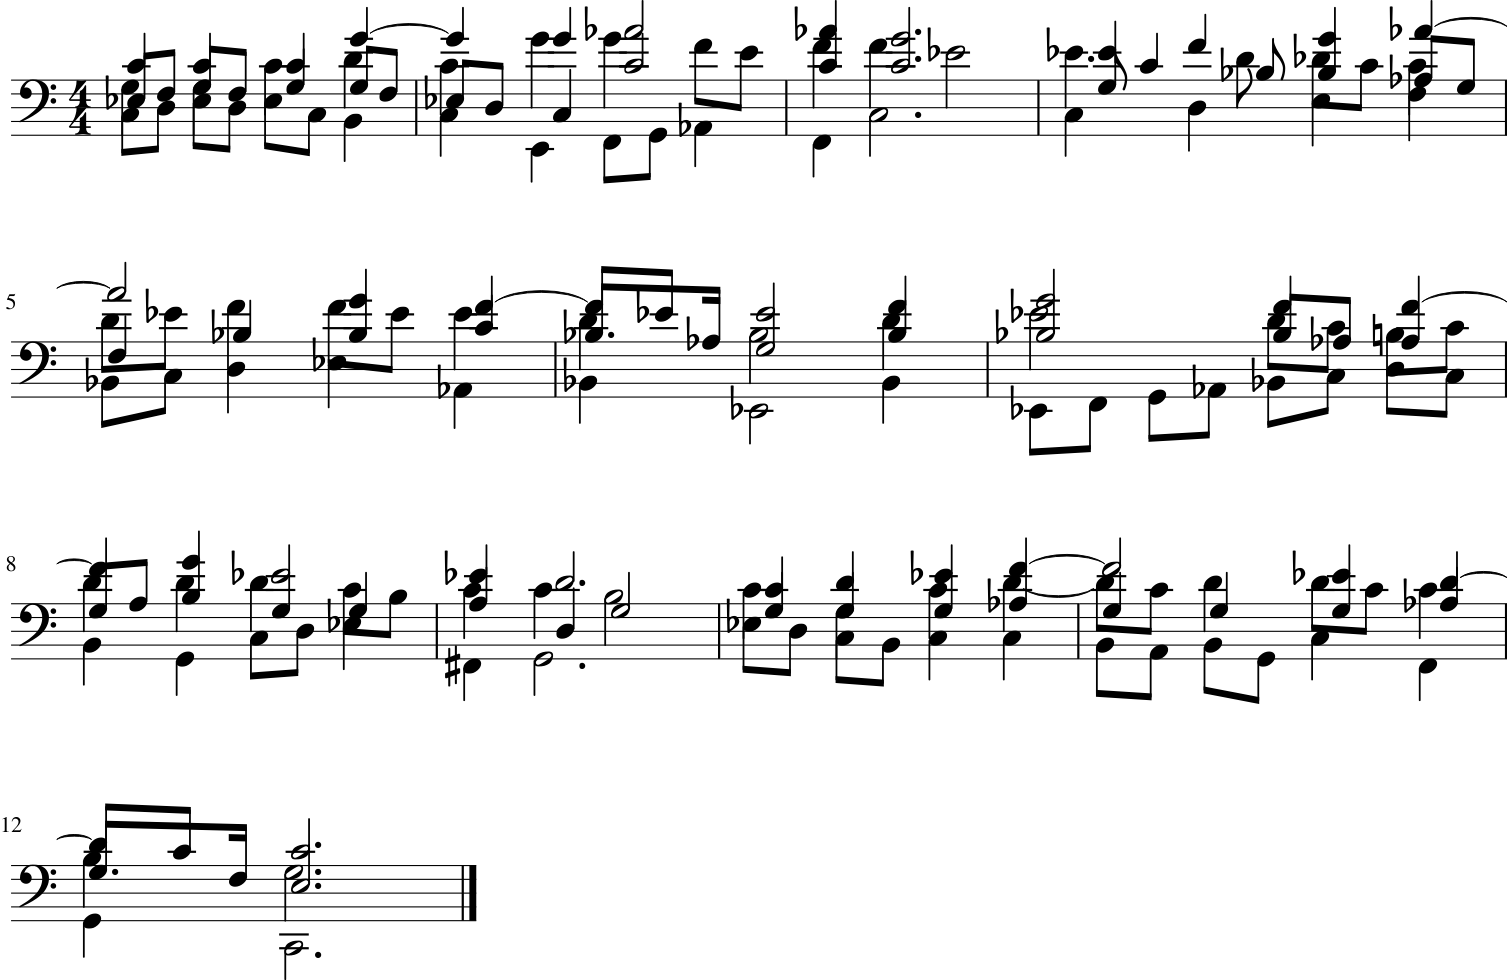

In [275]:
s1.show()

In [276]:
s1.show("midi")

In [237]:
n.pitch

<music21.pitch.Pitch C4>

In [252]:
p = m21.pitch.Pitch("C5")

In [253]:
p

<music21.pitch.Pitch C5>

In [254]:
n.pitch=p

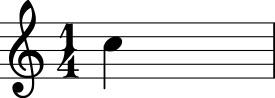

In [255]:
n.show()

In [260]:
d = m21.duration.Duration()
d.fullName = "Eighth"

AttributeError: can't set attribute